---
<div style="text-align: center;" >
    <h1>
        <b>データサイエンスプログラミング演習</b>
    </h1>
    <h3>
        第13,14回授業ノート
    </h3>
</div>
<div style="text-align: right">
    <br/>
    立津尚也
</div>

---

# 手書き文字認識の前処理


手書き文字認識とは
- 人間が手書きした文字を画像データとしてコンピュータに渡し、書かれている文字を予測させる

In [1]:
#JupyterLabでグラフや画像をインライン表示するための宣言
%matplotlib inline

#### **使用するPythonライブラリ**
|ライブラリ名|説明|
|:---:|:---|
|numpy| ナムパイと呼ぶ。機械学習などで科学計算を高速に行うためのライブラリ。|
|matplotlib| マットプロットリブと呼ぶ。グラフを描画するためのライブラリ。|
|pillow| ピローと呼ぶ。Pythonで画像を加工するためのライブラリ。切り抜きなどの画像加工ができる。|
|scikit-learn|※ライブラリに格納された手書き数字データセット、学習モデルを使用することができる。|

>※UCI(カリフォルニア大学アーバイン校）で作成、配布された手書き数字の画像データ（0から9までの手書きされた数字が合計1,797件収録されている）

# 手書き文字認識の流れ

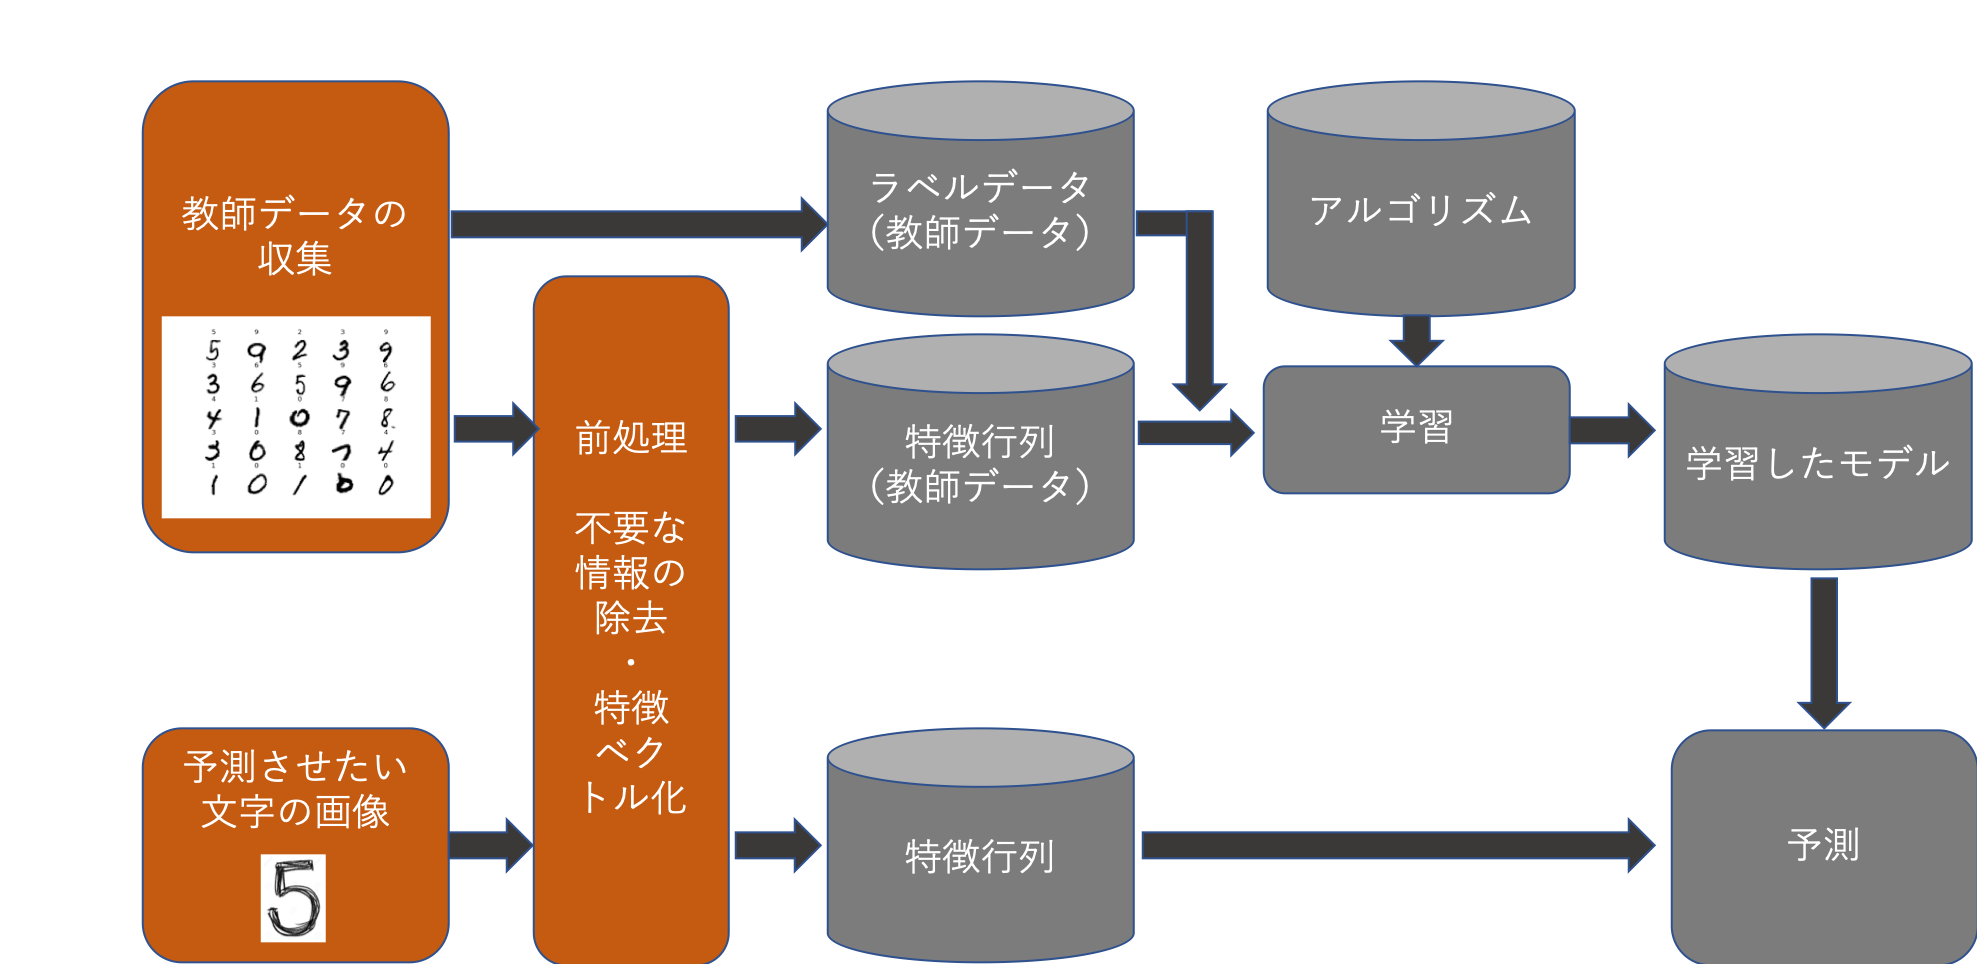

In [2]:
from PIL import Image
Image.open("data/mnist_flow.png")

## 特徴抽出

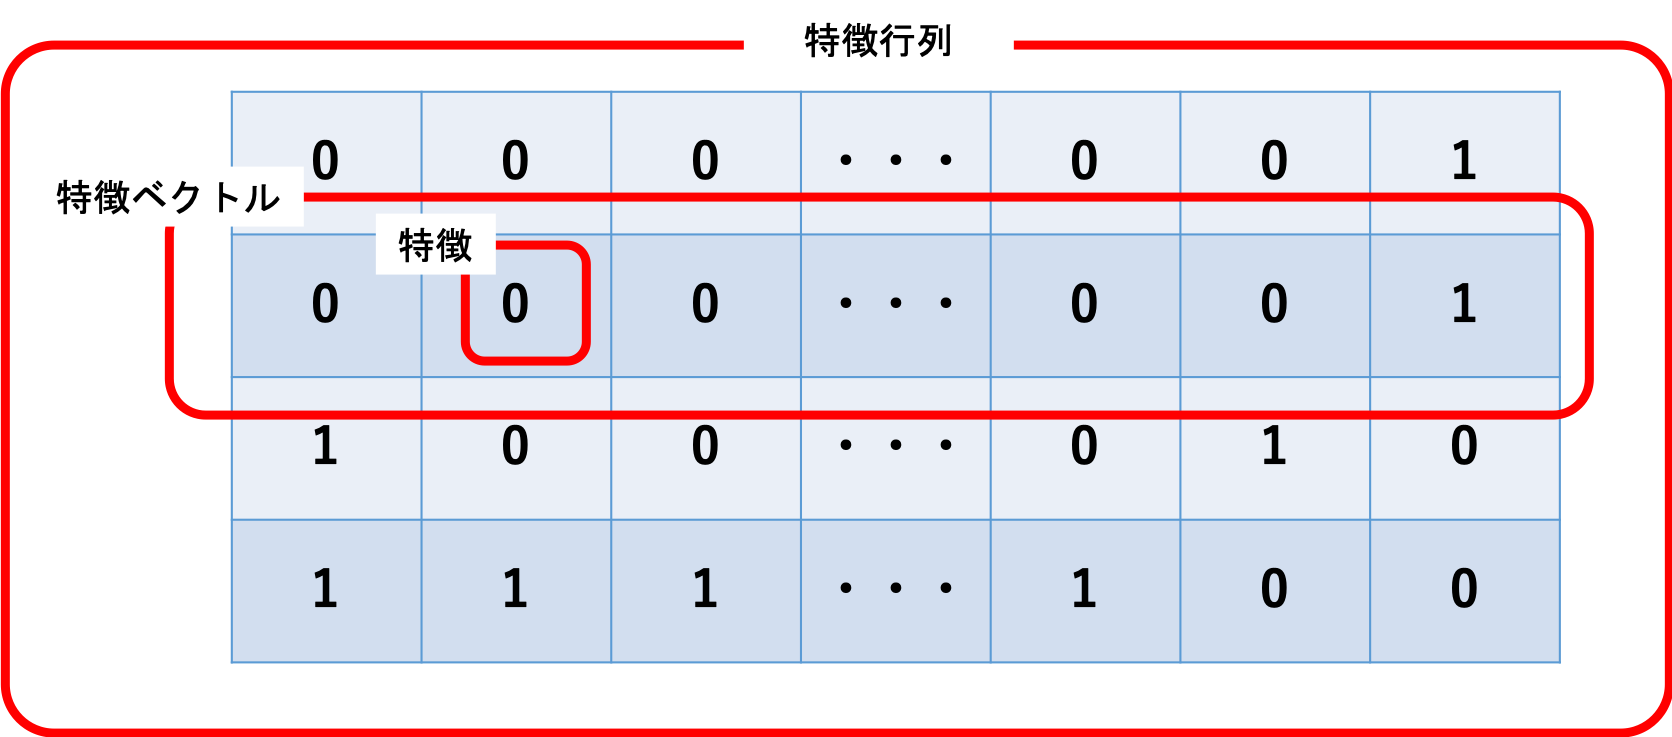

In [3]:
Image.open("data/feature_matrix.png")

　特徴抽出の過程では、機械学習で画像から文字を予測するために必要な情報のみを取り出す。機械学習で予測するために抽出された情報は、 **「特徴ベクトル」** と呼ばれる。また、複数の特徴ベトクルを並べたものを **「特徴行列」** と呼び、特徴ベクトルに含まれる個々の数値を **「特徴」** と呼ぶ。

## 手書き文字を特徴ベクトル化する

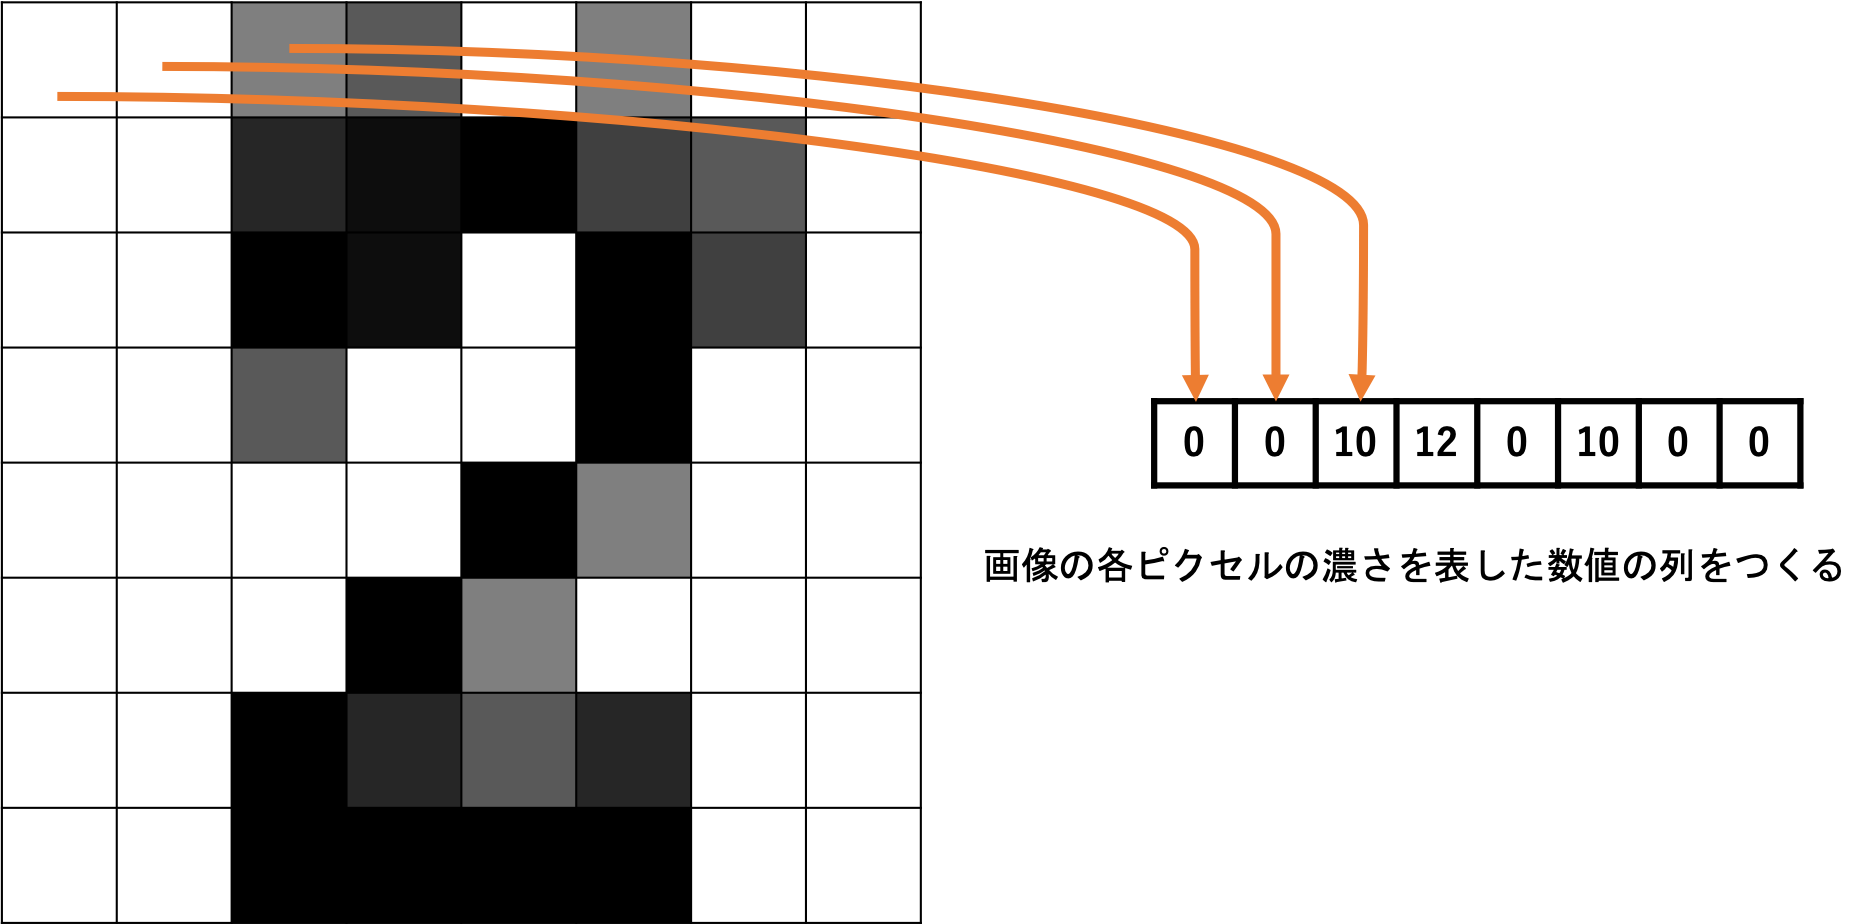

In [4]:
Image.open("data/feature_vector.png")

---
# 作業手順
1. 教師データ（正解データ）の収集
 - scikit-learnライブラリに収録された手書き文字データをロードする
1. データの確認
 - 特徴行列の内容確認
 - ラベルデータの内容確認
 - 特徴行列のデータの並び方を確認（shape)
 - ラベルデータの並び方を確認（shape)
 - 画像の表示
1. 予測させたい手書き数字の前処理

## 1. 教師データ（正解データ）の収集

In [5]:
from sklearn import datasets

#sklearnのデータセットから手書き文字をロードする
#X, y = datasets.load_digits(return_X_y=True) #注意：「 X 」は大文字
# return_X_y=True と記述することでデータとラベルの組み合わせで取得することができる

images = datasets.load_digits()
X = images.data    #教師データ（特徴行列）
y = images.target  #教師データ（ラベルデータ）

#### 特徴行列　　：上記Xのように、慣習的に行列の変数は **大文字英字** を使う。
#### ラベルデータ：上記yのように、ベクトルの変数は **小文字英字**を使う。
## 2. データの確認

In [6]:
#教師データ（特徴行列）を表示
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
#教師データ（ラベルデータ）を表示
y

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
#変数Xに格納された特徴行列は、何件の画像データがあるか、各画像のデータ数はいくつか
X.shape

(1797, 64)

In [9]:
#ラベルデータのshapeを確認する
#画像データの個数分だけデータが入っている
y.shape

(1797,)

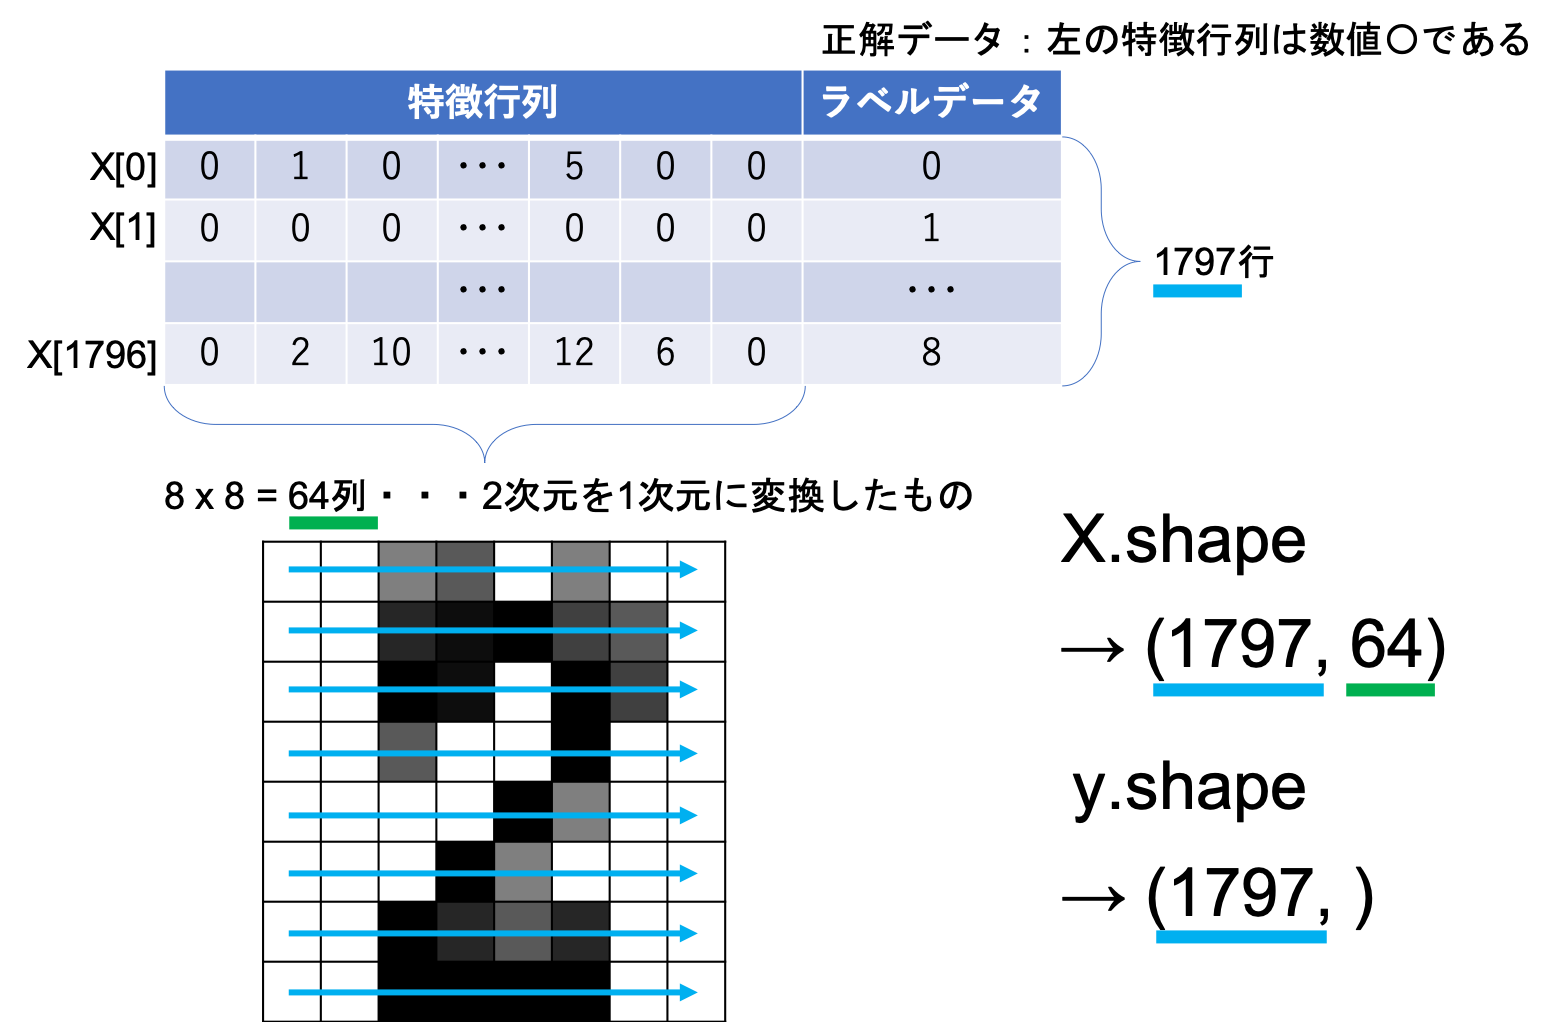

In [10]:
Image.open("data/shape.png")

In [11]:
#読み込んだ画像 X[0]のデータを表示する ＝ 64列の数値を表示
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
#読み込んだ画像 X[0]をX0に代入し、X0の列数を表示する
X0 = X[0]
X0.shape

(64,)

In [13]:
#X0 を　8 x 8の2次元データに変換する
X0_square = X0.reshape(8, 8)

#X0_squareの中身を表示する
X0_square

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
#X0_squareが 8 x 8 のデータの並びになっていることを確認する
X0_square.shape

(8, 8)

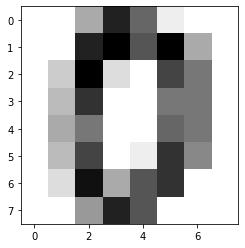

In [15]:
#matplotlibライブラリのpyplotモジュールをインポートする
from matplotlib import pyplot
#cmapはcolor mapの略、binaryモードで表示
pyplot.imshow(X0_square, cmap='binary');

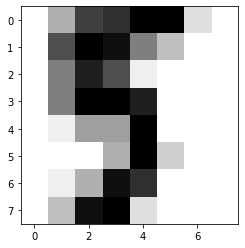

In [16]:
#別の画像を表示させてみる　例えば、X[15]を8x8の2次元データに変換し、変数X15に格納
X15 = X[15].reshape(8, 8)
#変数X15に格納された画像データをbinaryモードで表示
pyplot.imshow(X15, cmap='binary')

fig,ax = pyplot.subplots() #Figureオブジェクトとそれに属する一つのAxesオブジェクトとそれに属する一つのAxesオブジェクトを同時に作成 #subplot:グリッド上にグラフを表示

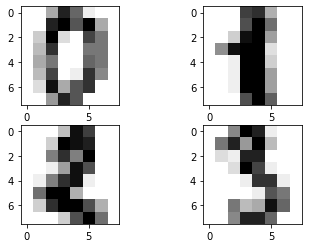

In [17]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(2,2) #グリッド上にグラフを表示
ax[0,0].imshow(X[0].reshape(8,8), cmap='binary');
ax[0,1].imshow(X[1].reshape(8,8), cmap='binary');
ax[1,0].imshow(X[2].reshape(8,8), cmap='binary');
ax[1,1].imshow(X[3].reshape(8,8), cmap='binary');

# 演習問題1

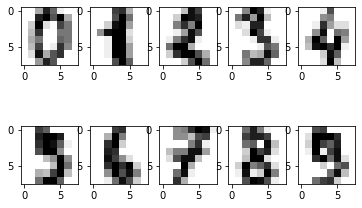

In [18]:
#for文を使って、X[0]〜X[9]に格納された10枚の画像データを
#pyplot.subplots()を使って2行5列に表示する、binaryモードで表示
fig, ax = pyplot.subplots(2,5)
for i in range(5):
    ax[0, i].imshow(X[i].reshape(8,8), cmap='binary');
    ax[1, i].imshow(X[i+5].reshape(8,8), cmap='binary');

# 3．予測させたい手書き数字の画像を前処理する
　たとえば、文字の色や背景色が異なる場合や影が映り込んでいる場合、文字の角度や大きさが異なる場合がある。前処理ではそのような不要な情報を取り除く。また、学習モデルに合わせたデータ形式に変換する。
### 手順
1. 画像の読込
1. 画像の切り抜き・・・**Pillow**を使って加工
1. 画像（文字）の明瞭化・・・**Pillow**を使って加工
1. グレースケール化・・・**Pillow**を使って加工
1. 画像の縮小・・・**Pillow**を使って加工
1. 明暗の反転・・・**Pillow**を使って加工
1. ndarrayに変換・・・　**Numpy** を使って加工
1. 階調の削減・・・ **Numpy** を使って加工

## 1.画像の読み込み
　PNG形式(.png）だとPillowで扱う際に問題が起きることがあるため、JPEG(.jpg)形式で保存したデータを使った方がいい。

(590, 364)


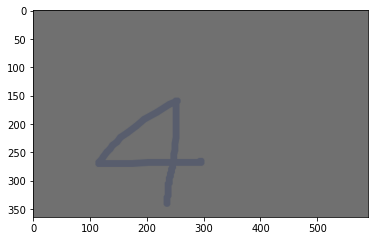

In [19]:
import matplotlib.pyplot as plt
# moji.jpgの画像と解像度を表示
im_moji = Image.open('data/moji.jpg')
#im_moji #これだけでも表示はできるが画像サイズがわからない
plt.imshow(im_moji); #切り抜きの目安となる数値を確認するためにimshowメソッドを使用
print(im_moji.size)

## 2.画像の切り抜き

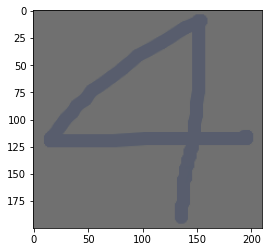

In [20]:
# 画像の切り抜き（PIL）
# crop(x1,y1,x2,y2)・・・ (left, upper, right, lower)
im_moji2 = im_moji.crop(
    (
        100,150,310,350
    )
)
plt.imshow(im_moji2);

## 3.画像（文字）の明瞭化

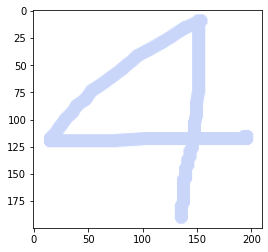

In [21]:
from PIL import ImageEnhance
#PILはPillowの略、Pillowライブラリの中にあるImageEnhanceモジュールを読み込む
enhancer = ImageEnhance.Brightness(im_moji2)
im_enhanced = enhancer.enhance(2.3)
#明度をアップする
#括弧の値：1.0が元の画像、1.0よりも大きな数字を設定すれば明るく、1.0より小さい数字を渡すと暗くなる
plt.imshow(im_enhanced);

## 4.グレースケール化
　手書き文字認識には文字が赤なのか緑なのかなどの色合いの情報は必要ない。そのため、手書き文字画像を二値化（白黒）やグレースケール化して、不要な色合い情報を除去する

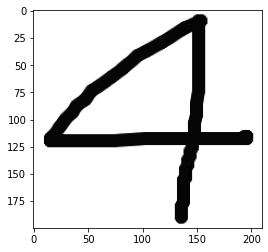

In [22]:
im_gray = im_enhanced.convert(mode='L') #modeのLは8bitグレイスケールという意味、他にも1で「1bit、マスクに使用、論理演算が可能」などがある
plt.imshow(im_gray, cmap='gray')

## 5.画像を縮小化
　予測させたい文字を認識させるには、認識させる手書き文字の画像を教師データと同じサイズまで縮小する必要がある。教師データの画像は8x8ピクセルなので、そのサイズまで画像を縮小する

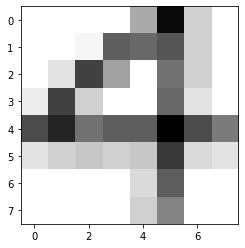

In [23]:
#PillowのImageオブジェクトのresize()メソッドを利用する
#resize()メソッドは、縮小後の画像の幅と高さのタプルを引数に取り、そのサイズに画像を縮小する。
#im_grayにはグレースケール化した画像データが格納されている
im_8x8 = im_gray.resize(
    (
        8, 8
    )
)
plt.imshow(im_8x8, cmap='gray')

## 6.明暗を反転させる
　教師データと予測させたい画像データとで明暗が逆になっていると、うまく文字認識ができない。<br>
 - 教師データ＝sklearnの手書き数字データセット・・・小さい値ほど明るく、大きい値ほど暗くなるように数値が振られている
 - 予測させたい画像データ・・・小さい値ほど暗く、大きい値ほど明るくなるように設定されているため、明暗を反転させる必要がある。

In [24]:
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.


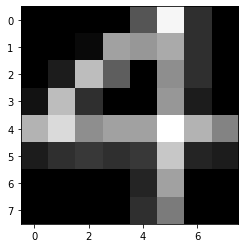

In [25]:
#PillowのImageOpsオブジェクトのinvert()メソッドを利用する
from PIL import ImageOps

im_inverted = ImageOps.invert(im_8x8)
plt.imshow(im_inverted, cmap='gray');

## 7. Numpyを使って画像をndarrayに変換する
　画像データを1次元のndarrayに変換する。

---
`上記のUCI手書き数字データセットの内容`
- 特徴行列
- ラベルデータ

`形式`
- Numpyの **ndarray** と呼ばれるデータ型（ndarray：N-dimensional arrayの略、N次元配列を略した名前）
 - リストの形式に似ているが、リストのように一列にデータを並べるだけでなく、縦（列）方向と横（行）方向にデータを並べることができる
 - 一列にデータを並べたもの・・・「1次元ndarray」
 - 二列にデータを並べたもの・・・「2次元ndarray」
- 特徴行列は行と列を持つので **2次元ndarray** で扱われる
---

Numpy　1次元、2次元ndarrayの例

In [26]:
#Numpyライブラリを読み込み、npという略称で扱う
import numpy as np

#1次元ndarray・・・リストから作成する例
data1 = np.array(
    [1,2,3]
)
data1

# タプルから作成する例
# data1 = np.array(
#    (5,6,7,8)
# )
# data1

array([1, 2, 3])

In [27]:
#2次元ndarray
data2 = np.array(
    [
        [1,2,3],
        [4,5,6]
    ]
)
data2

array([[1, 2, 3],
       [4, 5, 6]])

## shapeでndarrayに格納されたデータの並び方を確認できる

In [28]:
data1.shape

(3,)

In [29]:
#data2のデータの並び方を調べる
data2.shape

(2, 3)

In [30]:
# リストから3次元ndarrayを作成
data3 = np.array(
    [
        [
            [1,2,3],
            [4,5,6]
        ]
        ,
        [
            [7,8,9],
            [10,11,12]
        ]
    ]
)
data3

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [31]:
#data3のデータの並び方を調べる
data3.shape

(2, 2, 3)

In [32]:
# data4.shape を実行すると　(2, 2, 2)　と表示されるndarrayを作成しなさい
# リストから3次元ndarrayを作成
data4 = np.array(
    [
        [
            [1,2],
            [3,4]
        ]
        ,
        [
            [5,6],
            [7,8]
        ]
    ]
)
data4

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [33]:
#data4のデータの並び方を調べる
data4.shape

(2, 2, 2)

In [34]:
#data4のデータ数を確認
data4.size

8

---

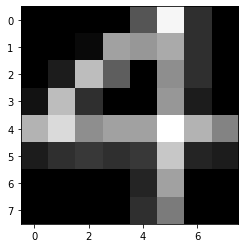

In [35]:
#明暗を反転された予測させたい画像を改めて表示
plt.imshow(im_inverted, cmap='gray');

### 前処理済みの予測させたい画像データをndarrayに変換する

In [36]:
#asarray関数を使用してndarrayに変換する
X_im2d = np.asarray(im_inverted)
X_im2d

array([[ 0,  0,  0,  0,  9, 26,  5,  0],
       [ 0,  0,  1, 17, 16, 18,  5,  0],
       [ 0,  3, 20, 10,  0, 15,  5,  0],
       [ 2, 20,  5,  0,  0, 16,  3,  0],
       [19, 23, 15, 17, 17, 27, 19, 14],
       [ 3,  5,  6,  5,  6, 21,  4,  3],
       [ 0,  0,  0,  0,  4, 17,  0,  0],
       [ 0,  0,  0,  0,  5, 13,  0,  0]], dtype=uint8)

In [37]:
#X_im2dのデータの並び方を調べる
X_im2d.shape

(8, 8)

In [38]:
#1次元のndarrayに変換する
X_im2d = X_im2d.reshape(-1) # (-1)は一行に変換しなさいという意味
X_im2d

array([ 0,  0,  0,  0,  9, 26,  5,  0,  0,  0,  1, 17, 16, 18,  5,  0,  0,
        3, 20, 10,  0, 15,  5,  0,  2, 20,  5,  0,  0, 16,  3,  0, 19, 23,
       15, 17, 17, 27, 19, 14,  3,  5,  6,  5,  6, 21,  4,  3,  0,  0,  0,
        0,  4, 17,  0,  0,  0,  0,  0,  0,  5, 13,  0,  0], dtype=uint8)

In [39]:
#各数値の範囲：0〜255を、0〜16に正規化する
X_multiplied = X_im2d * (16 / 255) #0~255の数値を255で割ると0~1.0の数値になるのでそれに16を掛ければよい
X_multiplied

array([0.        , 0.        , 0.        , 0.        , 0.56470588,
       1.63137255, 0.31372549, 0.        , 0.        , 0.        ,
       0.0627451 , 1.06666667, 1.00392157, 1.12941176, 0.31372549,
       0.        , 0.        , 0.18823529, 1.25490196, 0.62745098,
       0.        , 0.94117647, 0.31372549, 0.        , 0.1254902 ,
       1.25490196, 0.31372549, 0.        , 0.        , 1.00392157,
       0.18823529, 0.        , 1.19215686, 1.44313725, 0.94117647,
       1.06666667, 1.06666667, 1.69411765, 1.19215686, 0.87843137,
       0.18823529, 0.31372549, 0.37647059, 0.31372549, 0.37647059,
       1.31764706, 0.25098039, 0.18823529, 0.        , 0.        ,
       0.        , 0.        , 0.25098039, 1.06666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31372549, 0.81568627, 0.        , 0.        ])

# END

#### おまけ
さきほど前処理した手書き文字を学習モデルを用いて「何の数字か」を予測させる

In [40]:
#sklearn.linear_modelからLogisticRegressionクラスをインポートしてロジステック回帰モデルを作成する
#ロジスティック回帰モデル・・・よく使われるアルゴリズムの一つで、データの分類の用いられる
#scikit-learnでは、LogisticRegressionという名前でモデルが用意されている
from sklearn.linear_model import LogisticRegression

#clf・・・classifierの略、慣習的にclfという変数名がよく用いられる
clf = LogisticRegression(random_state=0, solver='liblinear')
clf

LogisticRegression(random_state=0, solver='liblinear')

In [41]:
#fit()メソッドで教師データをモデルに渡して、手書き文字を学習させる
clf.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

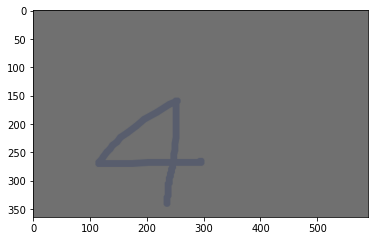

In [42]:
#改めて予測させたい画像を表示する
plt.imshow(im_moji);

In [43]:
#改めて予測させたい画像の特徴行列を確認する
X_multiplied

array([0.        , 0.        , 0.        , 0.        , 0.56470588,
       1.63137255, 0.31372549, 0.        , 0.        , 0.        ,
       0.0627451 , 1.06666667, 1.00392157, 1.12941176, 0.31372549,
       0.        , 0.        , 0.18823529, 1.25490196, 0.62745098,
       0.        , 0.94117647, 0.31372549, 0.        , 0.1254902 ,
       1.25490196, 0.31372549, 0.        , 0.        , 1.00392157,
       0.18823529, 0.        , 1.19215686, 1.44313725, 0.94117647,
       1.06666667, 1.06666667, 1.69411765, 1.19215686, 0.87843137,
       0.18823529, 0.31372549, 0.37647059, 0.31372549, 0.37647059,
       1.31764706, 0.25098039, 0.18823529, 0.        , 0.        ,
       0.        , 0.        , 0.25098039, 1.06666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31372549, 0.81568627, 0.        , 0.        ])

In [44]:
#predictメソッドに予測させたい画像の特徴行列を渡して、何の数字が予測させる
clf.predict([X_multiplied])[0] #予測結果は1件なので[0]で取り出す。4が表示されれば成功

4